# Titanic Disaster

[Kaggle Database](https://www.kaggle.com/competitions/titanic/data) 

<img src = "https://drive.google.com/uc?id=1N8r3PEw9q8xaVdeWx_4GgB6cmAGugxRr" width="500" >


## Import Libraries

In [1]:
import pandas as pd # Dataframe operations
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Cool plots
import opendatasets as od # Download data from Kaggle
import missingno as msno
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

import optuna

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
od.download("https://www.kaggle.com/c/titanic")

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


In [3]:
df_titanic = pd.read_csv("titanic/train.csv")
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heikkinen, Miss. Laina  female 26.000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1   
4                           Allen, Mr. William Henry    male 35.000      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171  7.250   NaN        S  
1      0          PC 17599 71.283   C85        C  
2      0  STON/O2. 3101282  7.925   NaN        S  
3      0            113803 53.100  C123        S  
4      0            373450  8.050   NaN        S

In [4]:
df_titanic.shape

(891, 12)

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_titanic.describe()

PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count      891.000   891.000 891.000 714.000 891.000 891.000 891.000
mean       446.000     0.384   2.309  29.699   0.523   0.382  32.204
std        257.354     0.487   0.836  14.526   1.103   0.806  49.693
min          1.000     0.000   1.000   0.420   0.000   0.000   0.000
25%        223.500     0.000   2.000  20.125   0.000   0.000   7.910
50%        446.000     0.000   3.000  28.000   0.000   0.000  14.454
75%        668.500     1.000   3.000  38.000   1.000   0.000  31.000
max        891.000     1.000   3.000  80.000   8.000   6.000 512.329

In [7]:
df_titanic.describe(include = "O")

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

<AxesSubplot:>

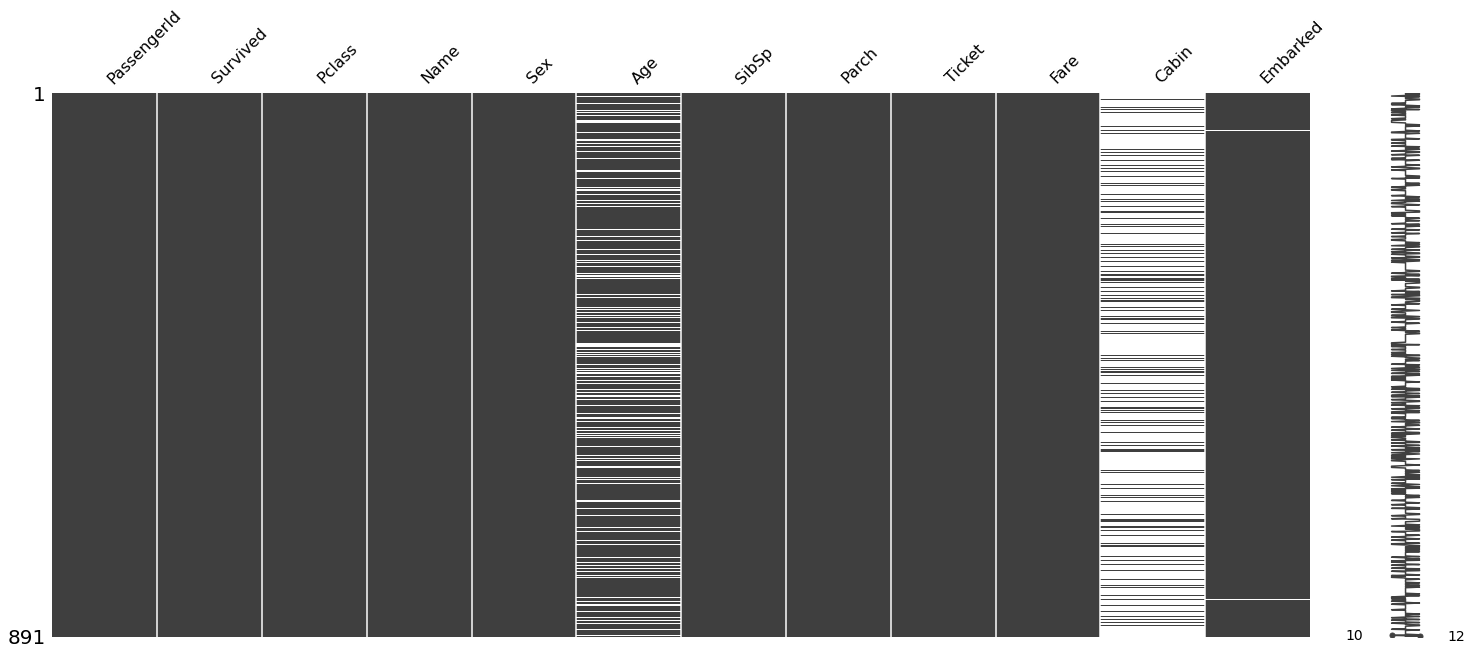

In [8]:
msno.matrix(df_titanic)

In [9]:
(df_titanic.isna().sum()/len(df_titanic)*100).to_frame().rename(columns = {0:"Missing Values[%]"})

Missing Values[%]
PassengerId              0.000
Survived                 0.000
Pclass                   0.000
Name                     0.000
Sex                      0.000
Age                     19.865
SibSp                    0.000
Parch                    0.000
Ticket                   0.000
Fare                     0.000
Cabin                   77.104
Embarked                 0.224

In [10]:
df_titanic.drop(["PassengerId", "Name", "Cabin"], axis = 1, inplace = True)

df_titanic.head()

Survived  Pclass     Sex    Age  SibSp  Parch            Ticket   Fare  \
0         0       3    male 22.000      1      0         A/5 21171  7.250   
1         1       1  female 38.000      1      0          PC 17599 71.283   
2         1       3  female 26.000      0      0  STON/O2. 3101282  7.925   
3         1       1  female 35.000      1      0            113803 53.100   
4         0       3    male 35.000      0      0            373450  8.050   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

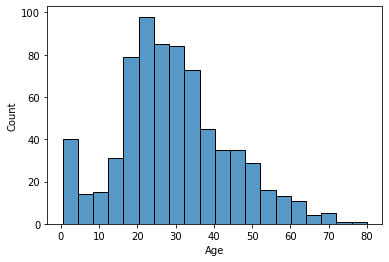

In [11]:
sns.histplot(df_titanic["Age"])
plt.show()

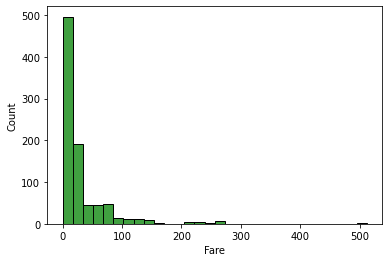

In [12]:
sns.histplot(df_titanic["Fare"], color = "g", bins  = 30)
plt.show()

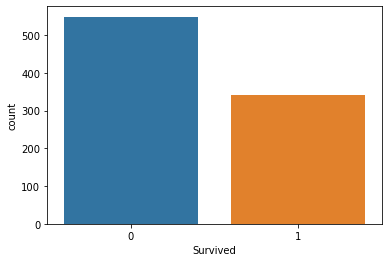

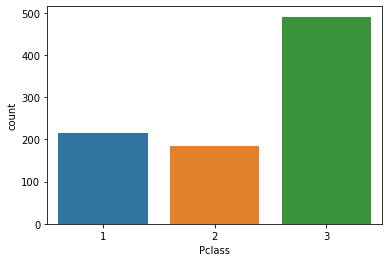

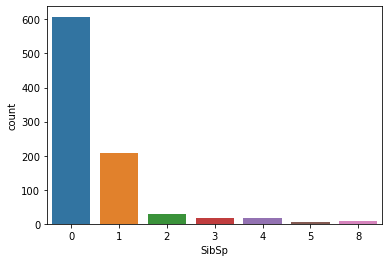

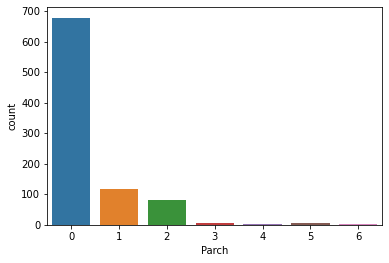

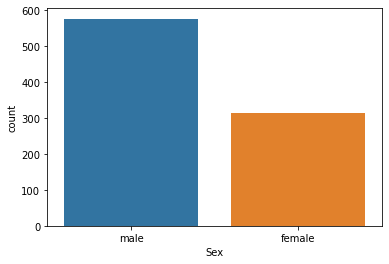

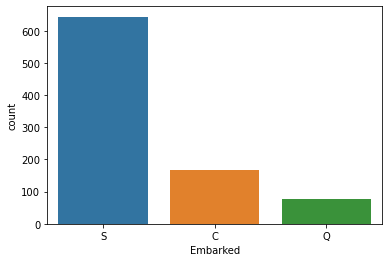

In [13]:
cate = ["Survived", "Pclass", "SibSp", "Parch", "Sex", "Embarked"]

for i in cate:
    sns.countplot(data = df_titanic, x = i)
    plt.show()

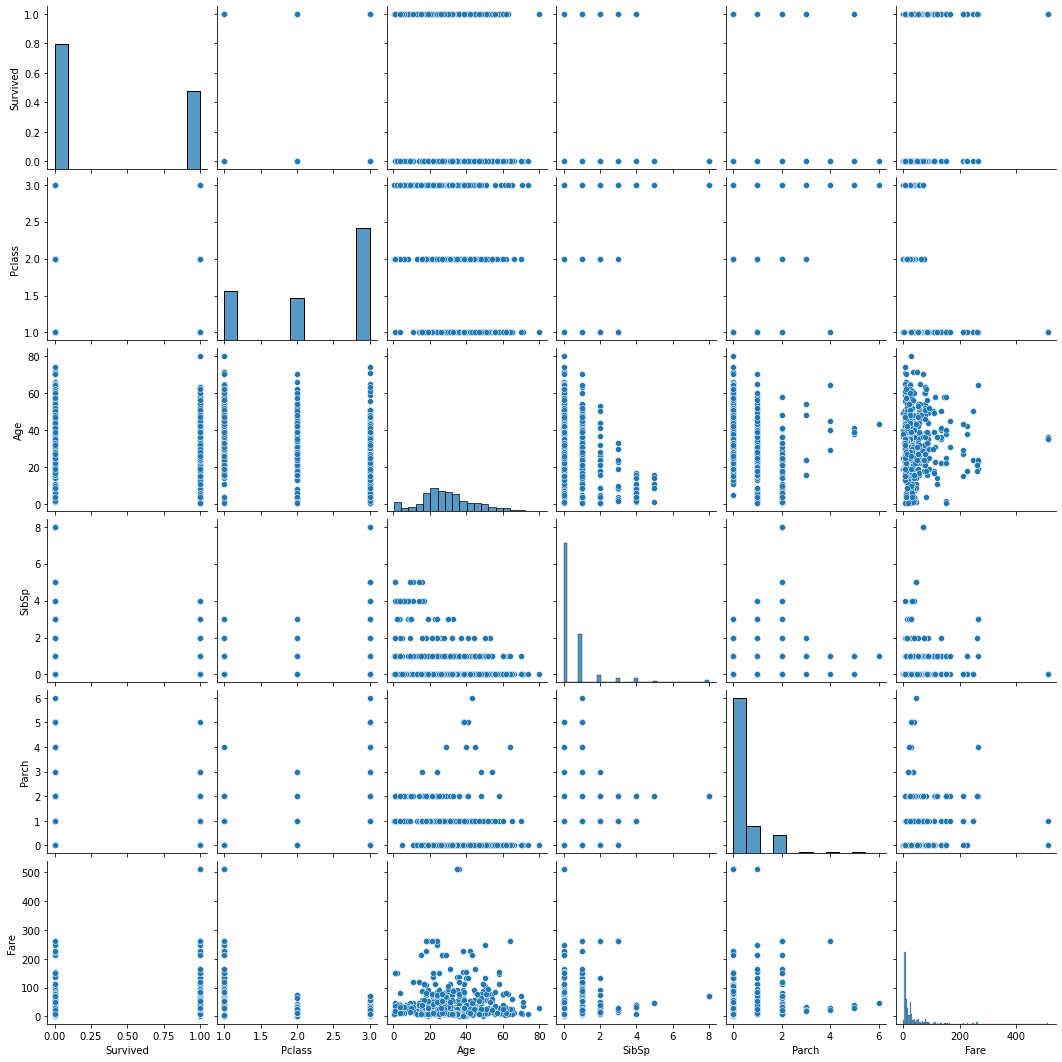

In [14]:
sns.pairplot(data = df_titanic)
plt.show()

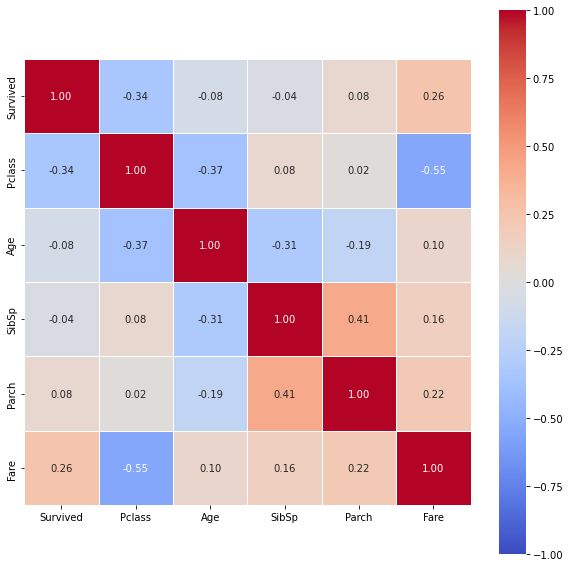

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_titanic.corr(method = "pearson"), vmin = - 1, vmax = 1, center = 0, fmt='.2f',
                square = True, linewidths = 0.5, annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
pd.pivot_table(df_titanic, index = "Survived", values = ["Age", "Fare"])

Age   Fare
Survived              
0        30.626 22.118
1        28.344 48.395

In [17]:
df_titanic[["Survived", "Pclass"]].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Pclass  Survived
0       1     0.630
1       2     0.473
2       3     0.242

In [18]:
df_titanic[["Survived", "SibSp"]].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

SibSp  Survived
1      1     0.536
2      2     0.464
0      0     0.345
3      3     0.250
4      4     0.167
5      5     0.000
6      8     0.000

In [19]:
df_titanic[["Survived", "Embarked"]].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Embarked  Survived
0        C     0.554
1        Q     0.390
2        S     0.337

In [20]:
df_titanic[["Survived", "Sex"]].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Sex  Survived
0  female     0.742
1    male     0.189

In [21]:
df_ticket = df_titanic[["Survived","Ticket"]]
df_ticket

Survived            Ticket
0           0         A/5 21171
1           1          PC 17599
2           1  STON/O2. 3101282
3           1            113803
4           0            373450
..        ...               ...
886         0            211536
887         1            112053
888         0        W./C. 6607
889         1            111369
890         0            370376

[891 rows x 2 columns]

In [22]:
df_ticket["Tiquete_Numerico"] = df_ticket["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)
df_ticket

C:\Users\acast\AppData\Local\Temp\ipykernel_4164\3729303016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket["Tiquete_Numerico"] = df_ticket["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)


Survived            Ticket  Tiquete_Numerico
0           0         A/5 21171                 0
1           1          PC 17599                 0
2           1  STON/O2. 3101282                 0
3           1            113803                 1
4           0            373450                 1
..        ...               ...               ...
886         0            211536                 1
887         1            112053                 1
888         0        W./C. 6607                 0
889         1            111369                 1
890         0            370376                 1

[891 rows x 3 columns]

In [23]:
df_ticket[["Survived", "Tiquete_Numerico"]].groupby(['Tiquete_Numerico'], as_index = False).mean().sort_values(by ='Survived', ascending = False)

Tiquete_Numerico  Survived
1                 1     0.384
0                 0     0.383

In [24]:
lista_letras = []
for i in df_ticket["Ticket"]:
    if i.isnumeric():
        continue
    else:
        lista_letras.append(i.split()[0])

lista_letras[:20]

['A/5',
 'PC',
 'STON/O2.',
 'PP',
 'A/5.',
 'PC',
 'PC',
 'C.A.',
 'PC',
 'A./5.',
 'SC/Paris',
 'S.C./A.4.',
 'A/4.',
 'PC',
 'C.A.',
 'C.A.',
 'CA',
 'PC',
 'C.A.',
 'S.P.']

In [25]:
Counter(lista_letras)

Counter({'A/5': 10,
         'PC': 60,
         'STON/O2.': 6,
         'PP': 3,
         'A/5.': 7,
         'C.A.': 27,
         'A./5.': 2,
         'SC/Paris': 4,
         'S.C./A.4.': 1,
         'A/4.': 3,
         'CA': 6,
         'S.P.': 1,
         'S.O.C.': 5,
         'SO/C': 1,
         'W./C.': 9,
         'SOTON/OQ': 7,
         'W.E.P.': 1,
         'STON/O': 12,
         'A4.': 1,
         'C': 5,
         'SOTON/O.Q.': 8,
         'SC/PARIS': 5,
         'S.O.P.': 1,
         'A.5.': 2,
         'Fa': 1,
         'CA.': 8,
         'LINE': 4,
         'F.C.C.': 5,
         'W/C': 1,
         'SW/PP': 1,
         'SCO/W': 1,
         'P/PP': 2,
         'SC': 1,
         'SC/AH': 3,
         'A/S': 1,
         'A/4': 3,
         'WE/P': 2,
         'S.W./PP': 1,
         'S.O./P.P.': 3,
         'F.C.': 1,
         'SOTON/O2': 2,
         'S.C./PARIS': 2,
         'C.A./SOTON': 1})

In [26]:
len(Counter(lista_letras))

43

In [27]:
df_titanic.drop("Ticket", axis = 1, inplace = True)
df_titanic.head()

Survived  Pclass     Sex    Age  SibSp  Parch   Fare Embarked
0         0       3    male 22.000      1      0  7.250        S
1         1       1  female 38.000      1      0 71.283        C
2         1       3  female 26.000      0      0  7.925        S
3         1       1  female 35.000      1      0 53.100        S
4         0       3    male 35.000      0      0  8.050        S

In [28]:
df_titanic["Embarked"].isna().sum()

2

In [29]:
df_titanic["Embarked"].fillna(df_titanic["Embarked"].mode()[0], inplace = True)
df_titanic["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df2 = pd.get_dummies(df_titanic, columns=["Sex", "Embarked"], drop_first = True)
df2.head()

Survived  Pclass    Age  SibSp  Parch   Fare  Sex_male  Embarked_Q  \
0         0       3 22.000      1      0  7.250         1           0   
1         1       1 38.000      1      0 71.283         0           0   
2         1       3 26.000      0      0  7.925         0           0   
3         1       1 35.000      1      0 53.100         0           0   
4         0       3 35.000      0      0  8.050         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [31]:
imputer_KNN = KNNImputer(n_neighbors = 10, weights = 'uniform', metric = 'nan_euclidean')

In [32]:
df_KNN = pd.DataFrame(imputer_KNN.fit_transform(df2), columns = df2.columns)

In [33]:
df_KNN.isna().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [34]:
df_KNN["SibSp"].value_counts()

0.000    608
1.000    209
2.000     28
4.000     18
3.000     16
8.000      7
5.000      5
Name: SibSp, dtype: int64

In [35]:
df_KNN["Parch"].value_counts()

0.000    678
1.000    118
2.000     80
5.000      5
3.000      5
4.000      4
6.000      1
Name: Parch, dtype: int64

In [36]:
df_KNN['Travel Alone'] = 0
df_KNN.loc[(df_KNN['SibSp'] + df_KNN['Parch']) == 0, 'Travel Alone'] = 1
df_KNN.head()

Survived  Pclass    Age  SibSp  Parch   Fare  Sex_male  Embarked_Q  \
0     0.000   3.000 22.000  1.000  0.000  7.250     1.000       0.000   
1     1.000   1.000 38.000  1.000  0.000 71.283     0.000       0.000   
2     1.000   3.000 26.000  0.000  0.000  7.925     0.000       0.000   
3     1.000   1.000 35.000  1.000  0.000 53.100     0.000       0.000   
4     0.000   3.000 35.000  0.000  0.000  8.050     1.000       0.000   

   Embarked_S  Travel Alone  
0       1.000             0  
1       0.000             0  
2       1.000             1  
3       1.000             0  
4       1.000             1

In [37]:
df_KNN[['Travel Alone', 'Survived']].groupby(['Travel Alone'], as_index=False).mean()

Travel Alone  Survived
0             0     0.506
1             1     0.304

In [38]:
df_KNN.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [39]:
df = df_KNN.copy()
df

Survived  Pclass    Age   Fare  Sex_male  Embarked_Q  Embarked_S  \
0       0.000   3.000 22.000  7.250     1.000       0.000       1.000   
1       1.000   1.000 38.000 71.283     0.000       0.000       0.000   
2       1.000   3.000 26.000  7.925     0.000       0.000       1.000   
3       1.000   1.000 35.000 53.100     0.000       0.000       1.000   
4       0.000   3.000 35.000  8.050     1.000       0.000       1.000   
..        ...     ...    ...    ...       ...         ...         ...   
886     0.000   2.000 27.000 13.000     1.000       0.000       1.000   
887     1.000   1.000 19.000 30.000     0.000       0.000       1.000   
888     0.000   3.000 25.300 23.450     0.000       0.000       1.000   
889     1.000   1.000 26.000 30.000     1.000       0.000       0.000   
890     0.000   3.000 32.000  7.750     1.000       1.000       0.000   

     Travel Alone  
0               0  
1               0  
2               1  
3               0  
4               1  
..            ...  
886             1  
887             1  
888             0  
889             1  
890             1  

[891 rows x 8 columns]

In [40]:
x = df.drop(["Survived"], axis = 1)
x

Pclass    Age   Fare  Sex_male  Embarked_Q  Embarked_S  Travel Alone
0     3.000 22.000  7.250     1.000       0.000       1.000             0
1     1.000 38.000 71.283     0.000       0.000       0.000             0
2     3.000 26.000  7.925     0.000       0.000       1.000             1
3     1.000 35.000 53.100     0.000       0.000       1.000             0
4     3.000 35.000  8.050     1.000       0.000       1.000             1
..      ...    ...    ...       ...         ...         ...           ...
886   2.000 27.000 13.000     1.000       0.000       1.000             1
887   1.000 19.000 30.000     0.000       0.000       1.000             1
888   3.000 25.300 23.450     0.000       0.000       1.000             0
889   1.000 26.000 30.000     1.000       0.000       0.000             1
890   3.000 32.000  7.750     1.000       1.000       0.000             1

[891 rows x 7 columns]

In [41]:
y = df["Survived"].values
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [43]:
scaler = StandardScaler()

In [44]:
x_train[["Age", "Fare"]] = scaler.fit_transform(x_train[["Age", "Fare"]])
x_train.head()

Pclass    Age   Fare  Sex_male  Embarked_Q  Embarked_S  Travel Alone
590   3.000  0.371 -0.487     1.000       0.000       1.000             1
833   3.000 -0.539 -0.473     1.000       0.000       1.000             1
105   3.000 -0.160 -0.472     1.000       0.000       1.000             1
360   3.000  0.749 -0.090     1.000       0.000       1.000             0
441   3.000 -0.766 -0.441     1.000       0.000       1.000             1

In [45]:
x_test[["Age", "Fare"]] = scaler.transform(x_test[["Age", "Fare"]])
x_test.head()

Pclass    Age   Fare  Sex_male  Embarked_Q  Embarked_S  Travel Alone
805   3.000  0.068 -0.474     1.000       0.000       1.000             1
837   3.000  0.238 -0.469     1.000       0.000       1.000             1
305   1.000 -2.212  2.268     1.000       0.000       1.000             0
586   2.000  1.280 -0.336     1.000       0.000       1.000             1
573   3.000 -0.792 -0.475     0.000       1.000       0.000             1

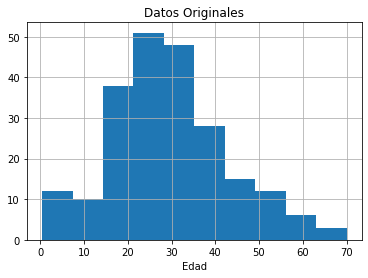

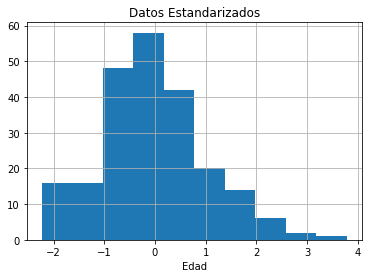

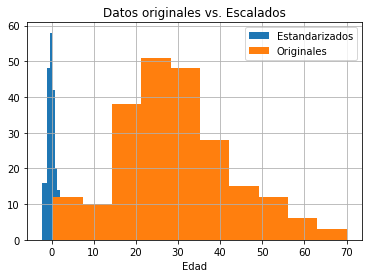

In [46]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.25, random_state = 0)

for i in range(3):
    if i == 0: # Originales
        x_test2["Age"].hist()
        plt.xlabel("Edad")
        plt.title("Datos Originales")
    elif  i == 1: # Estandarizados
        x_test["Age"].hist()
        plt.xlabel("Edad")
        plt.title("Datos Estandarizados")
  
    else:
        x_test["Age"].hist(label = "Estandarizados")
        x_test2["Age"].hist(label = "Originales")
        plt.xlabel("Edad")
        plt.title("Datos originales vs. Escalados")
        plt.legend()
    plt.show()

In [47]:
def modelo_clasificacion (modelo, x_train, y_train, x_test, y_test):
    m = modelo.fit(x_train, y_train)

    score_train = round(m.score(x_train, y_train) * 100, 2)
    score_test = round(m.score(x_test, y_test) *100, 2)
    cm = confusion_matrix(y_test, m.predict(x_test), labels = m.classes_)
    ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = m.classes_).plot()
    print(classification_report(y_test, m.predict(x_test), labels = m.classes_))

    return score_train, score_test

In [48]:
def validacion_cruzada (modelo, x, y, metrica):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    n_scores= cross_val_score(modelo, x, y, scoring = metrica, cv = cv, n_jobs = -1)

    media = np.mean(n_scores)
  
    COV = np.std(n_scores)/np.mean(n_scores)*100

    plt.plot(np.arange(1,len(n_scores)+1), n_scores, "o-", label = str(modelo))
    plt.axhline(media, color = "r", linestyle = "--")
    plt.legend(bbox_to_anchor=(1, 1))
  
    return media, COV

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       143
         1.0       0.80      0.75      0.77        80

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



(78.89, 84.3)

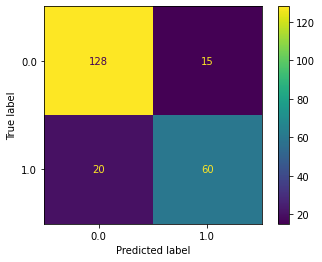

In [49]:
modelo_clasificacion(LogisticRegression(), x_train, y_train, x_test, y_test)

(0.7819272150354053, 4.455493137156875)

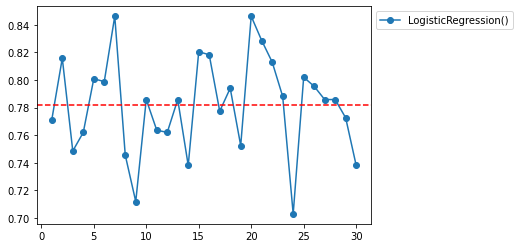

In [50]:
validacion_cruzada(LogisticRegression(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       143
         1.0       0.83      0.72      0.77        80

    accuracy                           0.85       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223



(85.63, 84.75)

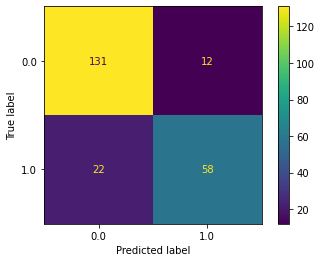

In [51]:
modelo_clasificacion(KNeighborsClassifier(), x_train, y_train, x_test, y_test)

(0.6667705650796126, 6.076367521340869)

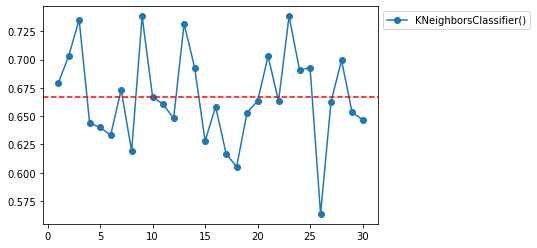

In [52]:
validacion_cruzada(KNeighborsClassifier(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       143
         1.0       0.76      0.72      0.74        80

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



(77.1, 82.06)

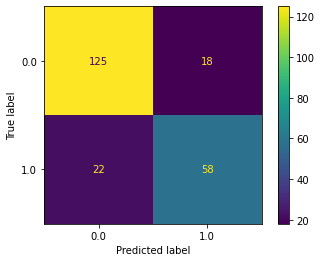

In [53]:
modelo_clasificacion(GaussianNB(), x_train, y_train, x_test, y_test)

(0.7638714403858589, 5.66423208345272)

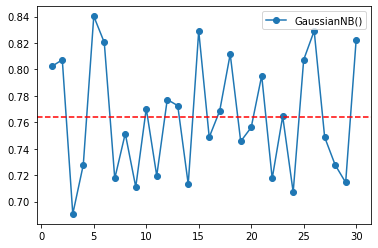

In [54]:
validacion_cruzada(GaussianNB(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       143
         1.0       0.78      0.74      0.76        80

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



(76.95, 82.96)

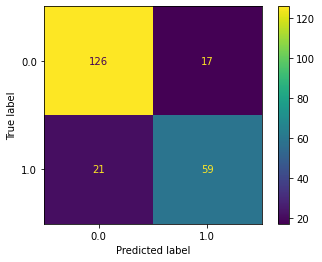

In [55]:
modelo_clasificacion(BernoulliNB(), x_train, y_train, x_test, y_test)

(0.7704167197569582, 5.416645859678355)

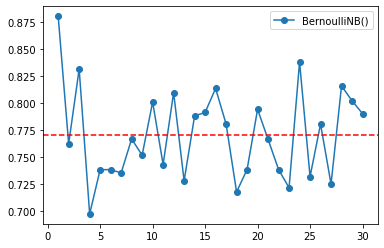

In [56]:
validacion_cruzada(BernoulliNB(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       143
         1.0       0.81      0.78      0.79        80

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



(99.1, 85.2)

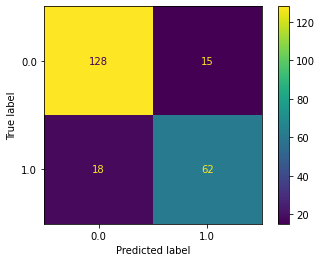

In [57]:
modelo_clasificacion(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

(0.7750385914376283, 5.391034471987454)

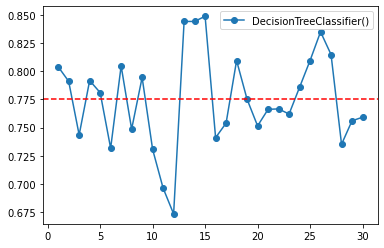

In [58]:
validacion_cruzada(DecisionTreeClassifier(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       143
         1.0       0.82      0.79      0.80        80

    accuracy                           0.86       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



(99.1, 86.1)

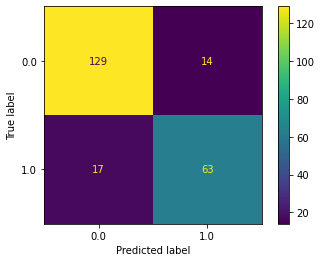

In [59]:
modelo_clasificacion(RandomForestClassifier(), x_train, y_train, x_test, y_test)

(0.8079301748397512, 4.767502936752331)

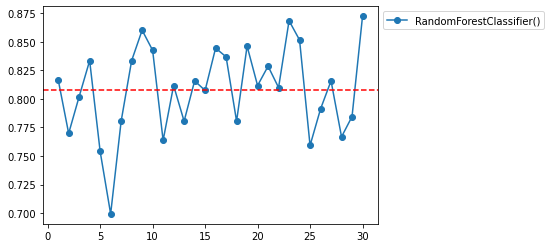

In [60]:
validacion_cruzada(RandomForestClassifier(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       143
         1.0       0.81      0.79      0.80        80

    accuracy                           0.86       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.86      0.86      0.86       223



(99.1, 85.65)

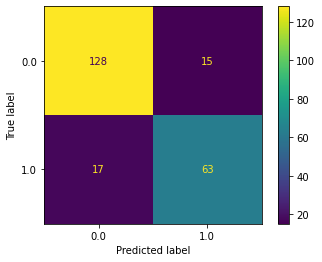

In [61]:
modelo_clasificacion(ExtraTreesClassifier(), x_train, y_train, x_test, y_test)

(0.793414679896225, 5.4602379510374375)

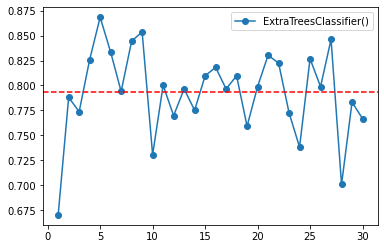

In [62]:
validacion_cruzada(ExtraTreesClassifier(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       143
         1.0       0.81      0.71      0.76        80

    accuracy                           0.84       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



(80.69, 83.86)

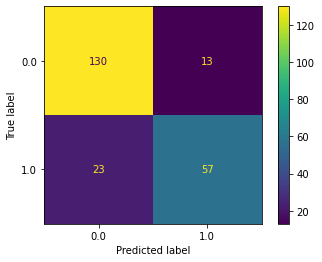

In [63]:
modelo_clasificacion(SVC(), x_train, y_train, x_test, y_test)

(0.5964561063642424, 8.941829488943876)

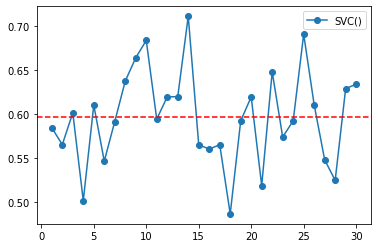

In [64]:
validacion_cruzada(SVC(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       143
         1.0       0.85      0.78      0.81        80

    accuracy                           0.87       223
   macro avg       0.86      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223



(98.5, 87.0)

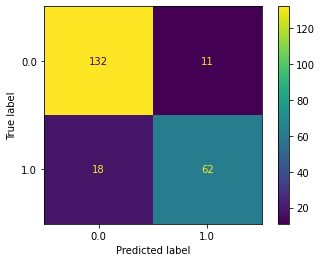

In [65]:
modelo_clasificacion(XGBClassifier(), x_train, y_train, x_test, y_test)

(0.8106129150294472, 4.563920038300682)

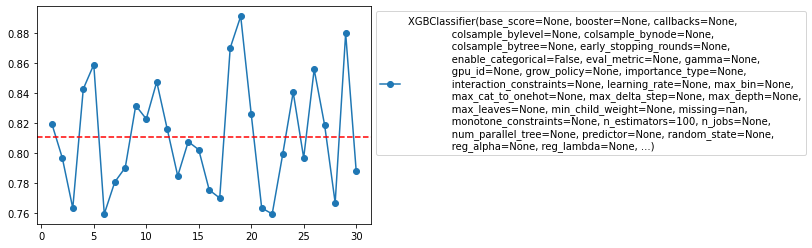

In [66]:
validacion_cruzada(XGBClassifier(), x, y, "f1_macro")

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       143
         1.0       0.82      0.72      0.77        80

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



C:\Users\acast\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(81.89, 84.3)

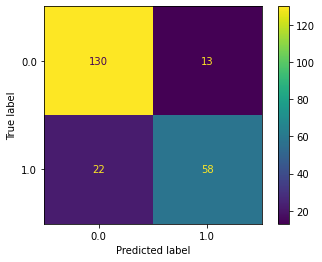

In [67]:
modelo_clasificacion(MLPClassifier(), x_train, y_train, x_test, y_test)

(0.6528852337078146, 13.939631946338105)

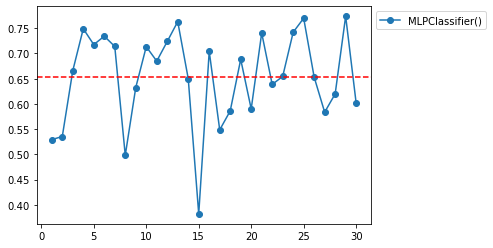

In [68]:
validacion_cruzada(MLPClassifier(), x, y, "f1_macro")

Model  f1_score_macro  COV [%]
8                XGBoost           0.814    5.490
5          Random Forest           0.809    5.655
6  Extra Tree Classifier           0.797    5.345
0   Logistic Regression            0.784    6.140
4    Decision Classifier           0.777    3.889
3  Naive Bayes Bernoulli           0.770    6.764
2   Naive Bayes Gaussian           0.762    6.486
1                    KNN           0.671    7.306
9         MLP Classifier           0.656   11.719
7                    SVC           0.592   10.000

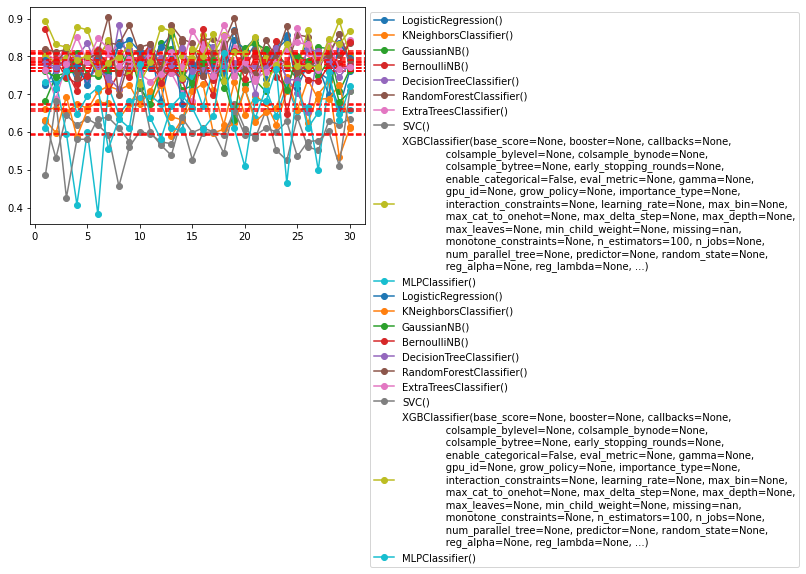

In [69]:
## Comparativa

models = pd.DataFrame({
    'Model': ["Logistic Regression ",
             "KNN",
             "Naive Bayes Gaussian",
             "Naive Bayes Bernoulli",
              "Decision Classifier",
              "Random Forest",
              "Extra Tree Classifier",
             "SVC",
              "XGBoost",
             "MLP Classifier"],

    'f1_score_macro': [validacion_cruzada(LogisticRegression(), x, y, "f1_macro")[0],
             validacion_cruzada(KNeighborsClassifier(), x, y, "f1_macro")[0],
             validacion_cruzada(GaussianNB(), x, y, "f1_macro")[0],
             validacion_cruzada(BernoulliNB(), x, y, "f1_macro")[0],
             validacion_cruzada(DecisionTreeClassifier(), x, y, "f1_macro")[0],
             validacion_cruzada(RandomForestClassifier(), x, y, "f1_macro")[0],
             validacion_cruzada(ExtraTreesClassifier(), x, y, "f1_macro")[0],
             validacion_cruzada(SVC(), x, y, "f1_macro")[0],
             validacion_cruzada(XGBClassifier(), x, y, "f1_macro")[0],
             validacion_cruzada(MLPClassifier(), x, y, "f1_macro")[0]],
             
      'COV [%]': [validacion_cruzada(LogisticRegression(), x, y, "f1_macro")[1],
             validacion_cruzada(KNeighborsClassifier(), x, y, "f1_macro")[1],
             validacion_cruzada(GaussianNB(), x, y, "f1_macro")[1],
             validacion_cruzada(BernoulliNB(), x, y, "f1_macro")[1],
             validacion_cruzada(DecisionTreeClassifier(), x, y, "f1_macro")[1],
             validacion_cruzada(RandomForestClassifier(), x, y, "f1_macro")[1],
             validacion_cruzada(ExtraTreesClassifier(), x, y, "f1_macro")[1],
             validacion_cruzada(SVC(), x, y, "f1_macro")[1],
             validacion_cruzada(XGBClassifier(), x, y, "f1_macro")[1], 
             validacion_cruzada(MLPClassifier(), x, y, "f1_macro")[1]]})

             
models.sort_values(by = 'f1_score_macro', ascending = False)

[(0.7762427818463272, 6.229521510782641),
 (0.809901871683212, 5.204673384764509),
 (0.7999325236969219, 4.948151149859283),
 (0.8115074575097488, 4.320807995027407)]

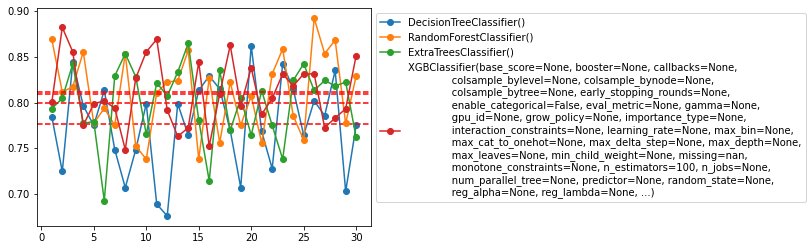

In [70]:
pre_tuning = []

pre_tuning.append(validacion_cruzada(DecisionTreeClassifier(), x, y, "f1_macro"))
pre_tuning.append(validacion_cruzada(RandomForestClassifier(), x, y, "f1_macro"))
pre_tuning.append(validacion_cruzada(ExtraTreesClassifier(), x, y, "f1_macro"))
pre_tuning.append(validacion_cruzada(XGBClassifier(), x, y, "f1_macro"))

pre_tuning

In [71]:
# Función de Sintonización

def op_DT (trial):

    _criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    _splitter = trial.suggest_categorical("splitter", ["best", "random"])
    _max_depth = trial.suggest_categorical("max_depth", [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    _min_samples_leaf = trial.suggest_categorical("min_samples_leaf", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


    model = DecisionTreeClassifier(criterion = _criterion,
                                 splitter= _splitter,
                                 max_depth = _max_depth,
                                 min_samples_leaf = _min_samples_leaf)
  
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    return cross_val_score(model, x, y, scoring = "f1_macro", cv = cv, n_jobs=-1).mean()

study_DT = optuna.create_study(direction = 'maximize')
study_DT.optimize(op_DT, n_trials = 100)

trial = study_DT.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-02-08 20:42:13,456] A new study created in memory with name: no-name-e7428450-aa33-4c1a-8097-90a9c2ac112f
[I 2023-02-08 20:42:13,514] Trial 0 finished with value: 0.7731756580276774 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 10, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.7731756580276774.
[I 2023-02-08 20:42:13,560] Trial 1 finished with value: 0.7901975425791004 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7901975425791004.
[I 2023-02-08 20:42:13,606] Trial 2 finished with value: 0.783337364960592 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 40, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.7901975425791004.
[I 2023-02-08 20:42:13,653] Trial 3 finished with value: 0.7832255215477459 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.

[I 2023-02-08 20:42:15,645] Trial 34 finished with value: 0.7790204812995268 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_leaf': 6}. Best is trial 9 with value: 0.810073804419203.
[I 2023-02-08 20:42:15,718] Trial 35 finished with value: 0.8013722567769415 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_leaf': 6}. Best is trial 9 with value: 0.810073804419203.
[I 2023-02-08 20:42:15,772] Trial 36 finished with value: 0.7767982760026999 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 20, 'min_samples_leaf': 10}. Best is trial 9 with value: 0.810073804419203.
[I 2023-02-08 20:42:15,836] Trial 37 finished with value: 0.8002937446058284 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 2}. Best is trial 9 with value: 0.810073804419203.
[I 2023-02-08 20:42:15,920] Trial 38 finished with value: 0.7811900595190331 and parameters: {'cri

[I 2023-02-08 20:42:17,871] Trial 69 finished with value: 0.800611625859569 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 1}. Best is trial 62 with value: 0.812351883519083.
[I 2023-02-08 20:42:17,915] Trial 70 finished with value: 0.7996926705925715 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_leaf': 6}. Best is trial 62 with value: 0.812351883519083.
[I 2023-02-08 20:42:17,961] Trial 71 finished with value: 0.8031059619136136 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 5}. Best is trial 62 with value: 0.812351883519083.
[I 2023-02-08 20:42:18,006] Trial 72 finished with value: 0.8016414764464844 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 5}. Best is trial 62 with value: 0.812351883519083.
[I 2023-02-08 20:42:18,059] Trial 73 finished with value: 0.8087005022510508 and parameters: {'c

Accuracy: 0.8140581946323292
Best hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 5}


In [72]:
optuna.visualization.plot_optimization_history(study_DT)

[(0.8079833411288047, 5.471610387203701)]

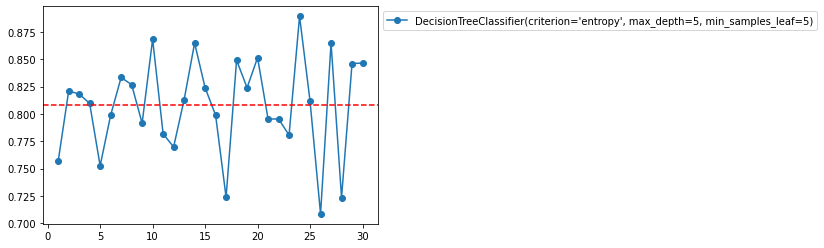

In [73]:

post_tuning = []


_criterion = trial.params["criterion"]
_splitter = trial.params["splitter"]
_max_depth = trial.params["max_depth"]
_min_samples_leaf = trial.params["min_samples_leaf"]

post_tuning.append(validacion_cruzada(DecisionTreeClassifier(criterion = _criterion, 
                                                         splitter = _splitter,
                                                         max_depth = _max_depth,
                                                         min_samples_leaf = _min_samples_leaf), x, y, "f1_macro"))

post_tuning

In [74]:
def op_RF (trial):

    _n_estimators = trial.suggest_int("n_estimators", 10, 100)
    _criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    _max_depth = trial.suggest_int("max_depth", 1, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(n_estimators = _n_estimators,
                                criterion = _criterion,
                                max_depth = _max_depth,
                                min_samples_leaf = _min_samples_leaf)
  
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    return cross_val_score(model, x, y, scoring = "f1_macro", cv = cv, n_jobs=-1).mean()

study_RF = optuna.create_study(direction = 'maximize')
study_RF.optimize(op_RF, n_trials = 30)

trial = study_RF.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-02-08 20:42:19,740] A new study created in memory with name: no-name-8b75b6a9-f4ad-4e25-b01e-f863874c0688
[I 2023-02-08 20:42:20,271] Trial 0 finished with value: 0.7964887752184983 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7964887752184983.
[I 2023-02-08 20:42:20,779] Trial 1 finished with value: 0.7965445265262061 and parameters: {'n_estimators': 64, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7965445265262061.
[I 2023-02-08 20:42:21,020] Trial 2 finished with value: 0.7094370518551119 and parameters: {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.7965445265262061.
[I 2023-02-08 20:42:21,612] Trial 3 finished with value: 0.7212454307688826 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7965445265

Accuracy: 0.8226126483225148
Best hyperparameters: {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2}


In [75]:

optuna.visualization.plot_optimization_history(study_RF)

[(0.8079833411288047, 5.471610387203701),
 (0.8174451745882431, 5.256061700245961)]

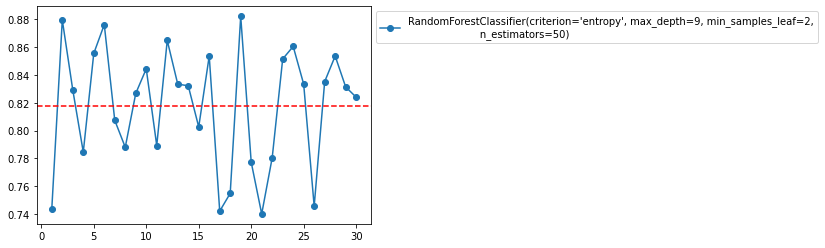

In [76]:
# Valores de desempeño post-tuning

_n_estimators = trial.params["n_estimators"]
_criterion = trial.params["criterion"]
_max_depth = trial.params["max_depth"]
_min_samples_leaf = trial.params["min_samples_leaf"]

post_tuning.append(validacion_cruzada(RandomForestClassifier(n_estimators = _n_estimators,
                                                             criterion = _criterion,
                                                             max_depth = _max_depth,
                                                             min_samples_leaf = _min_samples_leaf), x, y, "f1_macro"))

post_tuning

In [77]:
def op_ET (trial):

    _n_estimators = trial.suggest_int("n_estimators", 10, 100)
    _criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    _max_depth = trial.suggest_int("max_depth", 1, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = ExtraTreesClassifier(n_estimators = _n_estimators,
                                criterion = _criterion,
                                max_depth = _max_depth,
                                min_samples_leaf = _min_samples_leaf)
  
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    return cross_val_score(model, x, y, scoring = "f1_macro", cv = cv, n_jobs=-1).mean()

study_ET = optuna.create_study(direction = 'maximize')
study_ET.optimize(op_ET, n_trials = 30)

trial = study_ET.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-02-08 20:42:31,304] A new study created in memory with name: no-name-e40ba363-e607-4866-b4f7-cf23d68fad4d
[I 2023-02-08 20:42:31,413] Trial 0 finished with value: 0.7615712974582975 and parameters: {'n_estimators': 12, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7615712974582975.
[I 2023-02-08 20:42:31,682] Trial 1 finished with value: 0.7778804745415382 and parameters: {'n_estimators': 45, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7778804745415382.
[I 2023-02-08 20:42:32,137] Trial 2 finished with value: 0.7628590425287906 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7778804745415382.
[I 2023-02-08 20:42:32,456] Trial 3 finished with value: 0.7797541839166101 and parameters: {'n_estimators': 55, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.779754183

Accuracy: 0.808971391077957
Best hyperparameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


In [78]:
optuna.visualization.plot_optimization_history(study_ET)

[(0.8079833411288047, 5.471610387203701),
 (0.8174451745882431, 5.256061700245961),
 (0.8105660975391181, 5.175367893998193)]

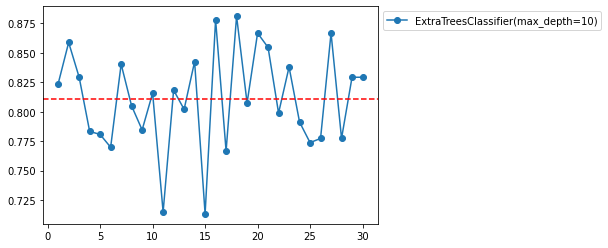

In [79]:
_n_estimators = trial.params["n_estimators"]
_criterion = trial.params["criterion"]
_max_depth = trial.params["max_depth"]
_min_samples_leaf = trial.params["min_samples_leaf"]

post_tuning.append(validacion_cruzada(ExtraTreesClassifier(n_estimators = _n_estimators,
                                                             criterion = _criterion,
                                                             max_depth = _max_depth,
                                                             min_samples_leaf = _min_samples_leaf), x, y, "f1_macro"))

post_tuning

In [80]:
def op_XG (trial):

    _booster = trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"])
    _eta = trial.suggest_float("eta", 0.01, 0.5)
    _gamma = trial.suggest_int("gamma", 1, 100)
    _max_depth = trial.suggest_int("max_depth", 1, 10)
    _subsample = trial.suggest_float("subsample", 0.1, 1)

    model = XGBClassifier(booster = _booster,
                        eta = _eta,
                        gamma = _gamma,
                        max_depth = _max_depth,
                        subsample = _subsample)
  
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
    
    return cross_val_score(model, x, y, scoring = "f1_macro", cv = cv, n_jobs=-1).mean()

study_XG = optuna.create_study(direction = 'maximize')
study_XG.optimize(op_XG, n_trials = 30)

trial = study_XG.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-02-08 20:42:45,162] A new study created in memory with name: no-name-c7d11986-c7a7-46b0-83b6-01cbd159b05a
[I 2023-02-08 20:42:45,534] Trial 0 finished with value: 0.5064647709240814 and parameters: {'booster': 'gbtree', 'eta': 0.36860518945123677, 'gamma': 57, 'max_depth': 4, 'subsample': 0.1297741364802798}. Best is trial 0 with value: 0.5064647709240814.
[I 2023-02-08 20:42:47,007] Trial 1 finished with value: 0.7705413595009877 and parameters: {'booster': 'dart', 'eta': 0.20141888143996176, 'gamma': 56, 'max_depth': 8, 'subsample': 0.8825115181362517}. Best is trial 1 with value: 0.7705413595009877.
[I 2023-02-08 20:42:47,597] Trial 2 finished with value: 0.782130200110804 and parameters: {'booster': 'gbtree', 'eta': 0.10564634365375655, 'gamma': 14, 'max_depth': 7, 'subsample': 0.57351879441175}. Best is trial 2 with value: 0.782130200110804.
[I 2023-02-08 20:42:48,077] Trial 3 finished with value: 0.7534988985167063 and parameters: {'booster': 'gbtree', 'eta': 0.3015556979

Accuracy: 0.822684693225529
Best hyperparameters: {'booster': 'gbtree', 'eta': 0.131080160448544, 'gamma': 1, 'max_depth': 3, 'subsample': 0.6597327478829302}


In [81]:
optuna.visualization.plot_optimization_history(study_XG)

[(0.8079833411288047, 5.471610387203701),
 (0.8174451745882431, 5.256061700245961),
 (0.8105660975391181, 5.175367893998193),
 (0.8202704109801461, 5.746042542959671)]

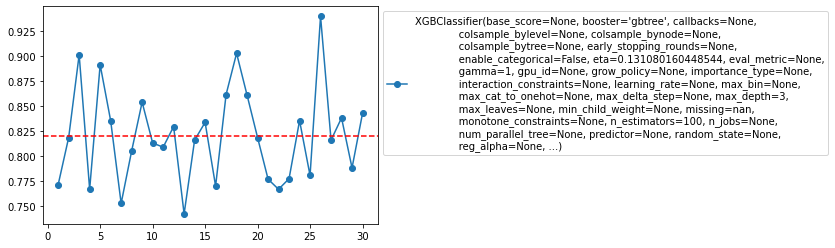

In [82]:
_booster = trial.params["booster"]
_eta = trial.params["eta"]
_gamma = trial.params["gamma"]
_max_depth = trial.params["max_depth"]
_subsample = trial.params["subsample"]


post_tuning.append(validacion_cruzada(XGBClassifier(booster = _booster,
                                                    eta = _eta,
                                                    gamma = _gamma,
                                                    max_depth = _max_depth,
                                                    subsample = _subsample), x, y, "f1_macro"))

post_tuning

In [83]:
# Comparativa

modelos = pd.DataFrame({
    'Model': ["Decision Tree Classifier",
              "Random Forest",
              "Extra Tree Classifier",
              "XGBoost"],

    'Pre-Tuning': [pre_tuning[0][0],
                   pre_tuning[1][0],
                   pre_tuning[2][0],
                   pre_tuning[3][0]],
                   
    'Post-Tuning': [post_tuning[0][0],
                   post_tuning[1][0],
                   post_tuning[2][0],
                   post_tuning[3][0]]})

             
modelos

Model  Pre-Tuning  Post-Tuning
0  Decision Tree Classifier       0.776        0.808
1             Random Forest       0.810        0.817
2     Extra Tree Classifier       0.800        0.811
3                   XGBoost       0.812        0.820

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       143
         1.0       0.89      0.71      0.79        80

    accuracy                           0.87       223
   macro avg       0.87      0.83      0.85       223
weighted avg       0.87      0.87      0.86       223



(89.07, 86.55)

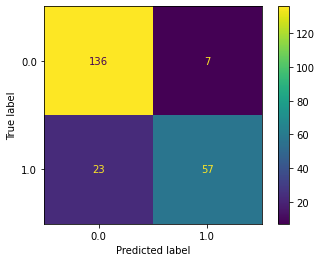

In [84]:
modelo_clasificacion(XGBClassifier(booster = _booster,
                            eta = _eta,
                            gamma = _gamma,
                            max_depth = _max_depth,
                            subsample = _subsample),
                     x_train, y_train, x_test, y_test)